#### DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

#### install  libraries

In [358]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [359]:
pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [360]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### importing libraries

In [361]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### IMPORT RAW DATA 

In [362]:
df=pd.read_csv(r'/Users/amrishra/Downloads/blinkit_data (3).csv')

In [363]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [364]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [365]:
df.shape

(8523, 12)

#### size of data

In [366]:
print("size of data:",df.shape)

size of data: (8523, 12)


#### field info

In [367]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [368]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Data Cleaning

In [369]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [370]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                        'low fat':'Low Fat',
                                                        'reg':'Regular',
                                                         })

In [371]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


#### Business Requirements

##### KPI's Requirements

In [372]:
#Total sales
total_sales=df['Sales'].sum()

#Average sales
avg_sales=df['Sales'].mean()

#No of items sold
no_of_items_sold =df['Sales'].count()

#average rating
avg_rating=df['Rating'].mean()

#Display

print(f"Total Sales :${total_sales:,.0f}")
print(f"Avg sales :${avg_sales:,.0f}")
print(f"No of items:{no_of_items_sold:,.0f}")
print(f"avg rating :{avg_rating:,.0f}")


Total Sales :$1,201,681
Avg sales :$141
No of items:8,523
avg rating :4


#### Chart Requirements

##### Total sales by fat content

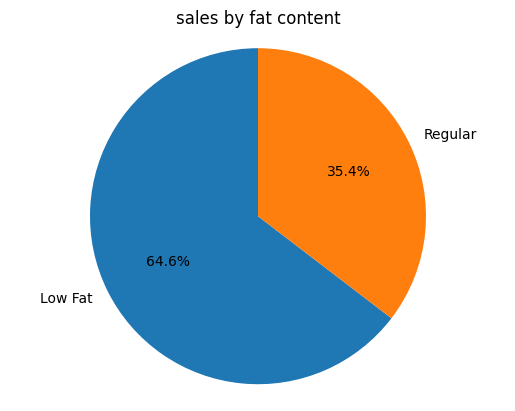

In [373]:
sales_by_fat =df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct= '%.1f%%',startangle=90)
plt.title('sales by fat content')
plt.axis('equal')
plt.show()

#### Total sales by item type

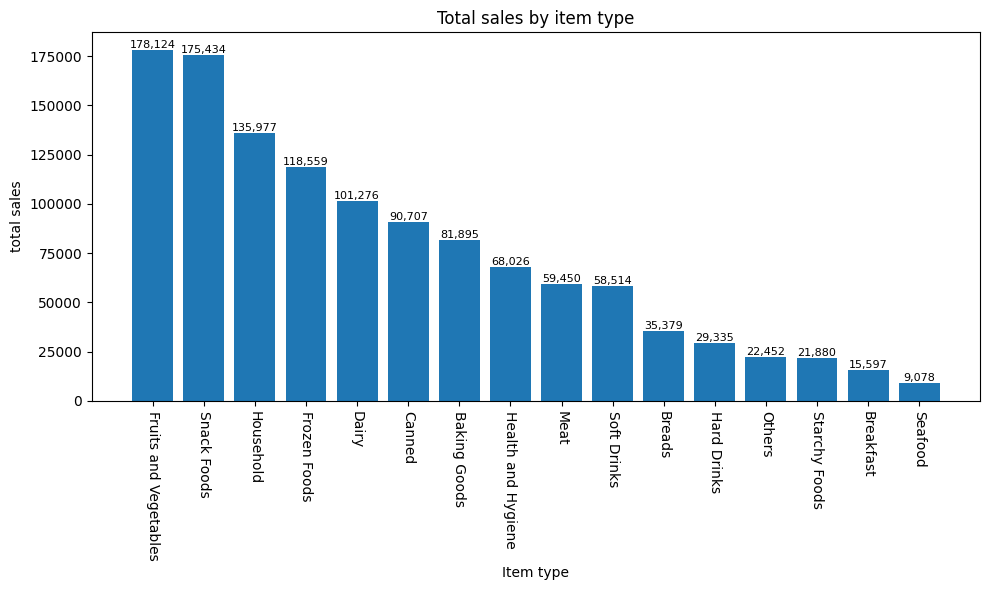

In [374]:
sales_by_type =df.groupby('Item Type')['Sales'].sum().sort_values(ascending =False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation =-90)
plt.xlabel('Item type')
plt.ylabel('total sales')
plt.title('Total sales by item type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
    
plt.tight_layout()
plt.show()

#### Total sales by item type

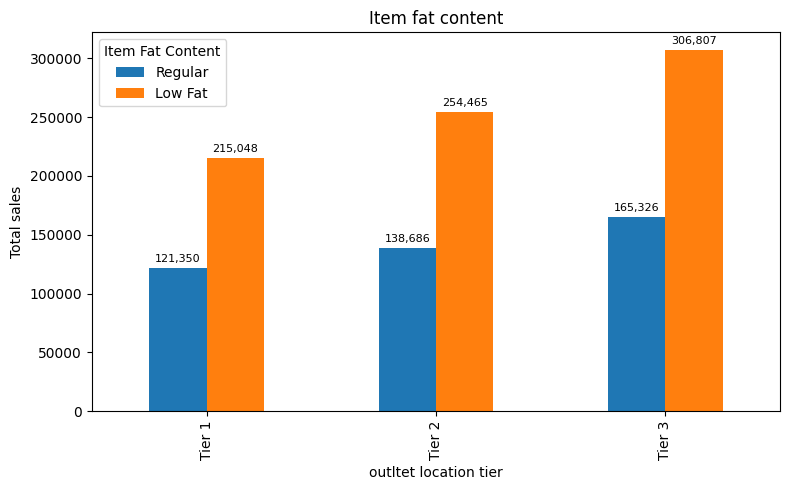

In [375]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax= grouped.plot(kind='bar',figsize=(8,5),title='outlet tier by item fat content')
plt.xlabel('outltet location tier')
plt.ylabel('Total sales')
plt.title('Item fat content')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()




#### Fat content by outlet Establishment

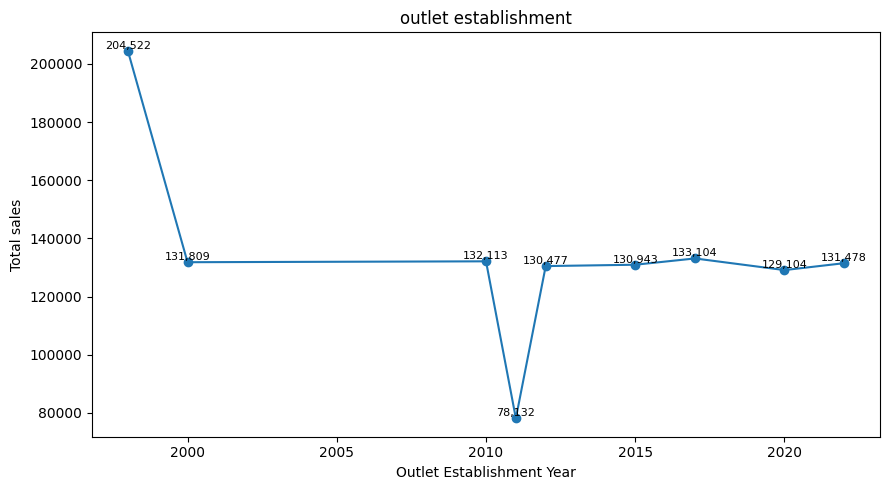

In [376]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()


plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-' )

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total sales')
plt.title('outlet establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}', ha= 'center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

#### sales by outlet size

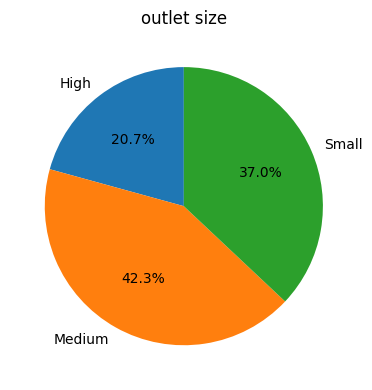

In [377]:
sales_by_size =df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('outlet size')
plt.tight_layout()
plt.show()

#### sales by outlet location

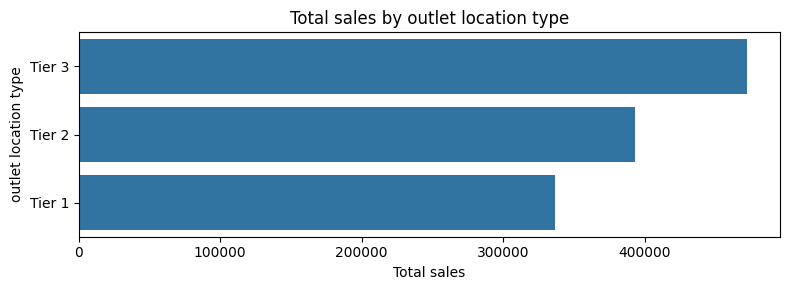

In [380]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(data=sales_by_location,x='Sales',y='Outlet Location Type')

plt.title('Total sales by outlet location type')
plt.xlabel('Total sales')
plt.ylabel('outlet location type')

plt.tight_layout()
plt.show()
